In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from matplotlib.animation import FuncAnimation, PillowWriter

# Definiëren van golfpakket

- Code meeleveren in de opgave
- Uitleg geven over hoe de class opgeroepen moet worden


In [35]:
class Wave_packet:

    def __init__(self, N, x0, sigma0, x_begin, x_end, k0=0):

        self.N = N
        self.x0 = x0
        self.sigma0 = sigma0
        self.x_begin = x_begin
        self.x_end = x_end
        self.k0 = k0

        self.x, self.dx = np.linspace(self.x_begin, self.x_end, self.N, retstep=True)

    def packet(self):
        self.psi0 = np.exp(-(self.x-self.x0)**2/(2*self.sigma0)**2) * np.exp(-1j * self.k0 * self.x)
        norm = np.sum(np.abs(self.psi0)**2*self.dx, axis=0)
        self.psi0 = self.psi0 / np.sqrt(norm)
        return self.psi0


# Definitie Potentiaal

- Code niet meegeven in de opgave.
- Misschien wel uitleg geven over hoe het potentiaal gedefinieerd kan worden.

Het potentiaal kan misschien ook iets eleganter gedefinieerd worden.


In [36]:
def potential(x, d, barriere1, barriere2, volt=1,):
     a = -volt / (d)
     k1 = (barriere1 + barriere2 + volt + a*(x-(75-d/2))) * ((x >= (75-d/2))* (x <= 75+d/2))
     k2 = (volt + barriere2) * ((x >= x[0]) * (x < (75-d/2)))

     return k1 + k2

In [37]:
packet = Wave_packet(10000, 20, 5, -150, 200, k0=-1)

x = packet.x
dx = packet.dx

V = potential(x, 5, 1, 0.5, volt=1)

(0.0, 150.0)

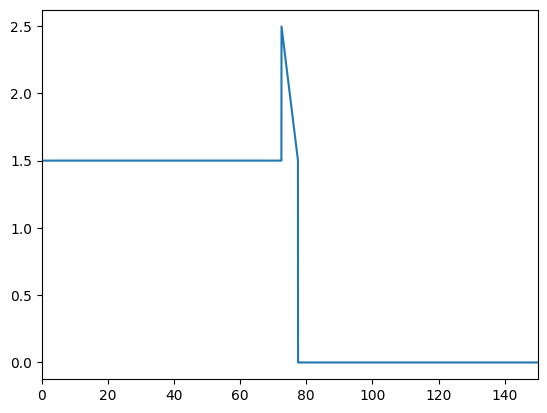

In [38]:
plt.plot(x, V)
plt.xlim([0, 150])

In [39]:
def get_e(x, dx, V):
    main = 1/dx**2 + V
    off = -1/(2*dx**2) * np.ones(len(main)-1)

    E, psi = eigh_tridiagonal(main, off)

    psi = psi.T

    norm = np.sum(np.abs(psi)**2 * dx, axis=0)
    psi = psi/np.sqrt(norm)

    return E, psi

In [40]:
def get_t(E, psi, psi0, t):

    cn = np.zeros_like(psi[0], dtype=complex)

    for j in range(0, len(psi)):

        cn[j] = np.sum(np.conj(psi[j]) * psi0 * dx)

    psi_t = psi.T@(cn*np.exp(-1j*E*t))
    norm = np.sum(np.abs(psi_t)**2 * dx)
    psi_t = psi_t/np.sqrt(norm)
    return psi_t

In [41]:
psi0 = packet.packet()
E, psi = get_e(x, dx, V)
t = np.linspace(0,25, 1000)
psi_t = get_t(E, psi, psi0, 120)

(0.0, 150.0)

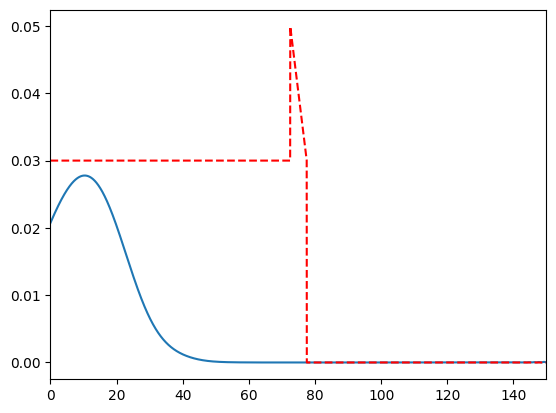

In [42]:
plt.plot(x, np.abs(psi_t)**2)
plt.plot(x, V/50, 'r--')
plt.xlim([0, 150])

# Animatie

Uitleg geven hoe de animatie kan worden uitgevoerd, maar er zijn ook veel voorbeelden online die precies beschrijven hoe je in in Python een animatie uitvoert

In [43]:
# fig = plt.figure(figsize = (10, 12))
# ax = plt.axes(xlim=(0,150), ylim=(0, 0.085))
# ax.plot(x, V/50, 'r--')

# ln, = ax.plot([],[])

# def animate(i):

#     ln.set_data(x, np.abs(get_t(E, psi, psi0, i))**2)
#     return ln,

# ani =  FuncAnimation(fig, animate, frames = 120, interval = 50, blit=False)

# ani.save('tunnel_schuin.gif', writer='pillow', fps=30, dpi=100)

# plt.show()

<img src="tunnel_schuin.gif" width="1000" height="800" />

In [44]:
psi_l = get_t(E, psi, psi0, 120)[x <= 75]
psi_r = get_t(E, psi, psi0, 120)[x > 75]
psi_t = get_t(E, psi, psi0, 120)

In [45]:
T = np.sum(np.abs(psi_r)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))
R = np.sum(np.abs(psi_l)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))

In [46]:
T

0.11555261982233361

In [47]:
R

0.8844473801776666

In [48]:
T+R

1.0000000000000002

In [49]:
d = np.linspace(0.1, 11, 100)
Ti = []
for i in d:
    V = potential(x, i, 1, 0.5, volt=1)
    psi0 = packet.packet()
    E, psi = get_e(x, dx, V)
    
    psi_l = get_t(E, psi, psi0, 120)[x <= 75]
    psi_r = get_t(E, psi, psi0, 120)[x > 75]
    psi_t = get_t(E, psi, psi0, 120)

    T = np.sum(np.abs(psi_r)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))
    Ti.append(T)

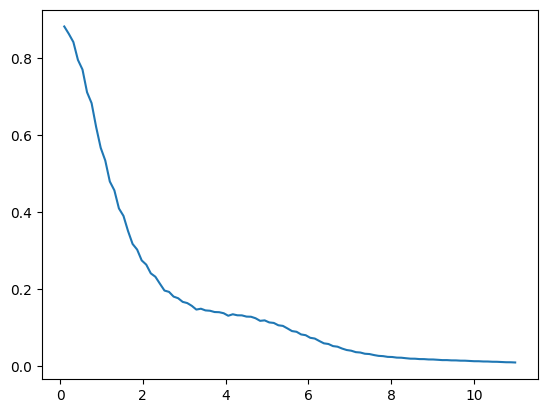

In [53]:
plt.plot(d, Ti)

plt.show()

In [51]:
V = potential(x, d[1], 1, 0.5, volt=1)
psi0 = packet.packet()
E, psi = get_e(x, dx, V)

psi_l = get_t(E, psi, psi0, 120)[x <= 75]
psi_r = get_t(E, psi, psi0, 120)[x > 75]
psi_t = get_t(E, psi, psi0, 120)

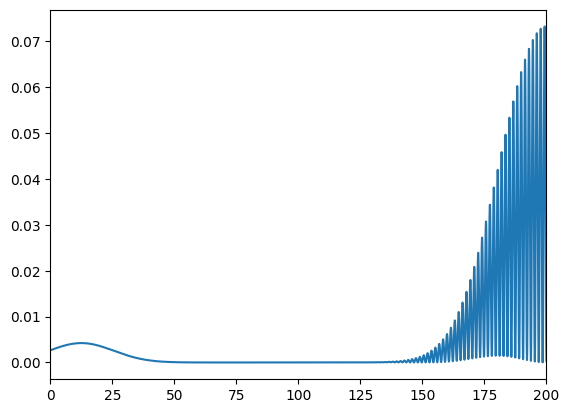

In [52]:
plt.plot(x, np.abs(psi_t)**2)
plt.xlim([0,200])
plt.show()